<a href="https://colab.research.google.com/github/athulmkpalath/prodigyinfotech/blob/main/Traffic_Accident_Analysis_Predictive_Insights_for_Road_Safety.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Traffic Accident Analysis: Predictive Insights for Road Safety**

---

INTERNSHIP PROJECT - @ PRODIGY INFOTECH

### **OBJECTIVE**

**Analyze Traffic Accident Patterns**:

*   Explore and identify patterns associated with road conditions, weather, and time of day in traffic accident data.
*   Visualize accident hotspots and contributing factors.

**Enhance Road Safety with Predictive Analysis**:

*   Develop and deploy a predictive traffic accident analysis system.
*   Improve road safety by leveraging insights from road conditions, weather, and time of day data.



**Optimize Model Selection for Accuracy**:

*   Evaluate various models using key performance metrics, including Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared (R2).
*   Choose the model that best balances accuracy and safety enhancements.*







DATA SOURCE

Dataset :-https://raw.githubusercontent.com/athulmkpalath/prodigyinfotech/main/accidents.csv

IMPORT LIBRARY

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder

**READ DATA**

In [3]:
data = pd.read_csv('/content/accidents.csv')

In [4]:
data.head()

,Severity,StartTime,EndTime,StartLat,StartLng,Distance,Street,City,State,Zipcode,...,Crossing,GiveWay,Junction,NoExit,Railway,Roundabout,Station,Stop,TrafficCalming,TrafficSignal
0,2,7/22/2019 14:43,7/22/2019 16:22,34.789009,-82.483383,0.000,Highway 153,Greenville,SC,29611,...,False,False,False,False,False,False,False,False,False,False
1,2,3/20/2019 16:12,3/20/2019 16:41,40.998264,-76.650396,0.472,Continental Blvd,Danville,PA,17821,...,False,False,False,False,False,False,False,False,False,False
2,3,12/12/2018 14:19,12/12/2018 14:48,33.461292,-112.082001,0.000,I-10 W,Phoenix,AZ,85003,...,False,False,False,False,False,False,False,False,False,False
3,2,3/9/2018 8:02,3/9/2018 8:49,42.288445,-87.924911,0.000,Oak Spring Rd,Libertyville,IL,60048,...,False,False,False,False,False,False,False,False,False,False
4,2,3/27/2020 5:36,3/27/2020 6:36,36.229259,-86.594650,0.000,Saundersville Rd,Old Hickory,TN,37138,...,False,False,False,False,False,False,False,False,False,False


In [5]:
data.tail()

,Severity,StartTime,EndTime,StartLat,StartLng,Distance,Street,City,State,Zipcode,...,Crossing,GiveWay,Junction,NoExit,Railway,Roundabout,Station,Stop,TrafficCalming,TrafficSignal
99995,3,6/18/2020 17:27,6/18/2020 17:42,41.574330,-87.496500,0.300,I-80 W,Hammond,IN,46324,...,False,False,False,False,False,False,False,False,False,False
99996,3,11/14/2017 12:41,11/14/2017 13:26,36.762577,-76.268204,0.000,I-464 S,Chesapeake,VA,23320,...,False,False,False,False,False,False,False,False,False,False
99997,3,1/30/2018 4:31,1/30/2018 5:05,42.928207,-78.898720,0.000,I-190 S,Buffalo,NY,14213,...,False,False,False,False,False,False,False,False,False,False
99998,4,3/30/2020 0:55,3/30/2020 2:15,40.693610,-73.394720,0.391,New Hwy,Copiague,NY,11726,...,False,False,False,False,False,False,False,False,False,True
99999,2,1/3/2020 16:10,1/3/2020 18:28,34.029221,-118.012451,0.000,Crossroads Pkwy S,La Puente,CA,91746,...,False,False,False,False,False,False,False,False,False,False


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Severity          100000 non-null  int64  
 1   StartTime         100000 non-null  object 
 2   EndTime           100000 non-null  object 
 3   StartLat          100000 non-null  float64
 4   StartLng          100000 non-null  float64
 5   Distance          100000 non-null  float64
 6   Street            100000 non-null  object 
 7   City              100000 non-null  object 
 8   State             100000 non-null  object 
 9   Zipcode           100000 non-null  int64  
 10  Temperature       100000 non-null  float64
 11  Humidity          100000 non-null  int64  
 12  Pressure          100000 non-null  float64
 13  Visibility        100000 non-null  float64
 14  WindSpeed         100000 non-null  float64
 15  Precipitation     100000 non-null  float64
 16  WeatherCondition  100

In [7]:
data.describe


<bound method NDFrame.describe of        Severity         StartTime           EndTime   StartLat    StartLng  \
0             2   7/22/2019 14:43   7/22/2019 16:22  34.789009  -82.483383   
1             2   3/20/2019 16:12   3/20/2019 16:41  40.998264  -76.650396   
2             3  12/12/2018 14:19  12/12/2018 14:48  33.461292 -112.082001   
3             2     3/9/2018 8:02     3/9/2018 8:49  42.288445  -87.924911   
4             2    3/27/2020 5:36    3/27/2020 6:36  36.229259  -86.594650   
...         ...               ...               ...        ...         ...   
99995         3   6/18/2020 17:27   6/18/2020 17:42  41.574330  -87.496500   
99996         3  11/14/2017 12:41  11/14/2017 13:26  36.762577  -76.268204   
99997         3    1/30/2018 4:31    1/30/2018 5:05  42.928207  -78.898720   
99998         4    3/30/2020 0:55    3/30/2020 2:15  40.693610  -73.394720   
99999         2    1/3/2020 16:10    1/3/2020 18:28  34.029221 -118.012451   

       Distance             S

In [8]:
# List of unimportant columns to drop
columns_to_drop = ['Amenity', 'Bump', 'GiveWay', 'Junction', 'NoExit', 'Railway', 'Roundabout', 'Station', 'Stop', 'TrafficCalming']

# Drop the unimportant columns
data = data.drop(columns=columns_to_drop)


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Severity          100000 non-null  int64  
 1   StartTime         100000 non-null  object 
 2   EndTime           100000 non-null  object 
 3   StartLat          100000 non-null  float64
 4   StartLng          100000 non-null  float64
 5   Distance          100000 non-null  float64
 6   Street            100000 non-null  object 
 7   City              100000 non-null  object 
 8   State             100000 non-null  object 
 9   Zipcode           100000 non-null  int64  
 10  Temperature       100000 non-null  float64
 11  Humidity          100000 non-null  int64  
 12  Pressure          100000 non-null  float64
 13  Visibility        100000 non-null  float64
 14  WindSpeed         100000 non-null  float64
 15  Precipitation     100000 non-null  float64
 16  WeatherCondition  100

In [10]:
# Extract relevant time information from 'StartTime'
data['StartTime'] = pd.to_datetime(data['StartTime'])
data['HourOfDay'] = data['StartTime'].dt.hour
data['DayOfWeek'] = data['StartTime'].dt.dayofweek

# Drop the original 'StartTime' column
data = data.drop(columns=['StartTime'])

In [11]:
data.head()

,Severity,EndTime,StartLat,StartLng,Distance,Street,City,State,Zipcode,Temperature,Humidity,Pressure,Visibility,WindSpeed,Precipitation,WeatherCondition,Crossing,TrafficSignal,HourOfDay,DayOfWeek
0,2,7/22/2019 16:22,34.789009,-82.483383,0.000,Highway 153,Greenville,SC,29611,93.0,45,28.86,10.0,16.0,0.0,Fair,False,False,14,0
1,2,3/20/2019 16:41,40.998264,-76.650396,0.472,Continental Blvd,Danville,PA,17821,51.1,29,30.23,10.0,9.2,0.0,Clear,False,False,16,2
2,3,12/12/2018 14:48,33.461292,-112.082001,0.000,I-10 W,Phoenix,AZ,85003,64.9,40,29.99,10.0,8.1,0.0,Partly Cloudy,False,False,14,2
3,2,3/9/2018 8:49,42.288445,-87.924911,0.000,Oak Spring Rd,Libertyville,IL,60048,27.0,63,30.04,10.0,5.8,0.0,Mostly Cloudy,False,False,8,4
4,2,3/27/2020 6:36,36.229259,-86.594650,0.000,Saundersville Rd,Old Hickory,TN,37138,68.0,65,29.20,10.0,7.0,0.0,Mostly Cloudy,False,False,5,4


## **CLEANING AND PREPROCESSING**



---



HANDLING MISSING VALUE

In [12]:
data['Zipcode'].fillna(data['Zipcode'].median(), inplace=True)  # Example for filling a numerical column
data['WeatherCondition'].fillna(data['WeatherCondition'].mode()[0], inplace=True)  # Example for filling a categorical column


HANDLING DUPLICATE

In [13]:
data = data.drop_duplicates()


DATA TYPE CONVERSION

In [14]:
data['Zipcode'] = data['Zipcode'].astype(int)  # Example of changing data type to integer


<ipython-input-14-5dcdfc11ce49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Zipcode'] = data['Zipcode'].astype(int)  # Example of changing data type to integer


STRING CLEANING

In [15]:
data['Street'] = data['Street'].str.strip()


<ipython-input-15-12e993f1901e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Street'] = data['Street'].str.strip()


DATA TRANSFORMATION


In [16]:
data = pd.get_dummies(data, columns=['WeatherCondition'])  # Example of one-hot encoding


FEATURE SCALING

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['Temperature', 'Humidity']] = scaler.fit_transform(data[['Temperature', 'Humidity']])


FEATURE ENGINEERING

In [18]:
data['Weekend'] = (data['DayOfWeek'] >= 5).astype(int)  # Example of creating a 'Weekend' flag


REMOVING UNNECESSARY COLOUM

In [19]:
data = data.drop(columns=['EndTime'])  # Corrected column name to 'EndTime'



In [20]:
data.head()

,Severity,StartLat,StartLng,Distance,Street,City,State,Zipcode,Temperature,Humidity,...,WeatherCondition_T-Storm,WeatherCondition_T-Storm / Windy,WeatherCondition_Thunder,WeatherCondition_Thunder / Windy,WeatherCondition_Thunder in the Vicinity,WeatherCondition_Thunderstorm,WeatherCondition_Thunderstorms and Rain,WeatherCondition_Widespread Dust,WeatherCondition_Wintry Mix,Weekend
0,2,34.789009,-82.483383,0.000,Highway 153,Greenville,SC,29611,1.648422,-0.856575,...,0,0,0,0,0,0,0,0,0,0
1,2,40.998264,-76.650396,0.472,Continental Blvd,Danville,PA,17821,-0.560380,-1.547659,...,0,0,0,0,0,0,0,0,0,0
2,3,33.461292,-112.082001,0.000,I-10 W,Phoenix,AZ,85003,0.167101,-1.072539,...,0,0,0,0,0,0,0,0,0,0
3,2,42.288445,-87.924911,0.000,Oak Spring Rd,Libertyville,IL,60048,-1.830837,-0.079107,...,0,0,0,0,0,0,0,0,0,0
4,2,36.229259,-86.594650,0.000,Saundersville Rd,Old Hickory,TN,37138,0.330521,0.007279,...,0,0,0,0,0,0,0,0,0,0


## EDA

In [21]:
data

,Severity,StartLat,StartLng,Distance,Street,City,State,Zipcode,Temperature,Humidity,...,WeatherCondition_T-Storm,WeatherCondition_T-Storm / Windy,WeatherCondition_Thunder,WeatherCondition_Thunder / Windy,WeatherCondition_Thunder in the Vicinity,WeatherCondition_Thunderstorm,WeatherCondition_Thunderstorms and Rain,WeatherCondition_Widespread Dust,WeatherCondition_Wintry Mix,Weekend
0,2,34.789009,-82.483383,0.000,Highway 153,Greenville,SC,29611,1.648422,-0.856575,...,0,0,0,0,0,0,0,0,0,0
1,2,40.998264,-76.650396,0.472,Continental Blvd,Danville,PA,17821,-0.560380,-1.547659,...,0,0,0,0,0,0,0,0,0,0
2,3,33.461292,-112.082001,0.000,I-10 W,Phoenix,AZ,85003,0.167101,-1.072539,...,0,0,0,0,0,0,0,0,0,0
3,2,42.288445,-87.924911,0.000,Oak Spring Rd,Libertyville,IL,60048,-1.830837,-0.079107,...,0,0,0,0,0,0,0,0,0,0
4,2,36.229259,-86.594650,0.000,Saundersville Rd,Old Hickory,TN,37138,0.330521,0.007279,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3,41.574330,-87.496500,0.300,I-80 W,Hammond,IN,46324,1.121262,-1.158924,...,0,0,0,0,0,0,0,0,0,0
99996,3,36.762577,-76.268204,0.000,I-464 S,Chesapeake,VA,23320,-0.497121,-0.208685,...,0,0,0,0,0,0,0,0,0,0
99997,3,42.928207,-78.898720,0.000,I-190 S,Buffalo,NY,14213,-2.205121,1.173482,...,0,0,0,0,0,0,0,0,0,0
99998,4,40.693610,-73.394720,0.391,New Hwy,Copiague,NY,11726,-0.776516,0.914326,...,0,0,0,0,0,0,0,0,0,0


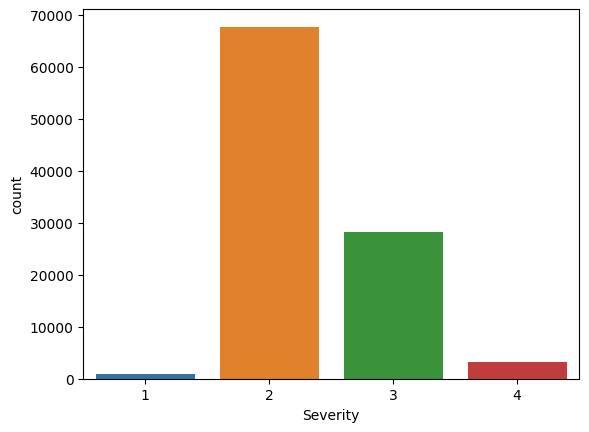

In [22]:

# Count plots for categorical variables
sns.countplot(data=data, x='Severity')
plt.show()



In [23]:
numerical_columns = data[['Severity', 'StartLat', 'StartLng', 'Distance', 'Zipcode', 'Temperature', 'Humidity', 'Pressure', 'Visibility', 'WindSpeed', 'Precipitation', 'HourOfDay', 'DayOfWeek']]


In [24]:
data.info()





<class 'pandas.core.frame.DataFrame'>
Int64Index: 99972 entries, 0 to 99999
Data columns (total 95 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Severity                                       99972 non-null  int64  
 1   StartLat                                       99972 non-null  float64
 2   StartLng                                       99972 non-null  float64
 3   Distance                                       99972 non-null  float64
 4   Street                                         99972 non-null  object 
 5   City                                           99972 non-null  object 
 6   State                                          99972 non-null  object 
 7   Zipcode                                        99972 non-null  int64  
 8   Temperature                                    99972 non-null  float64
 9   Humidity                                       999

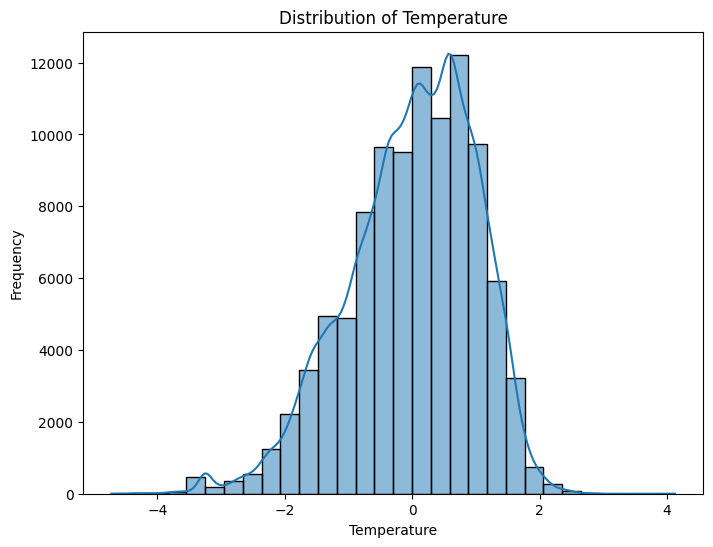

In [25]:
# EDA for the 'Temperature' column
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Temperature', kde=True, bins=30)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

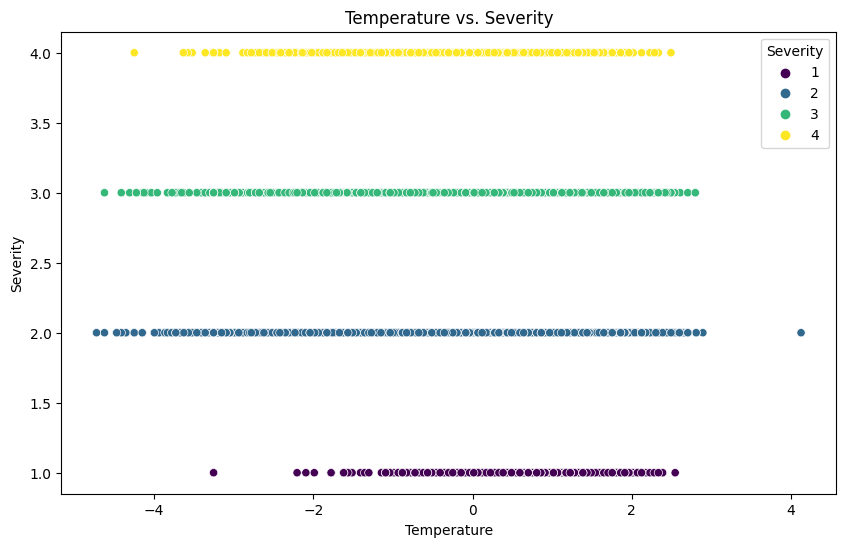

In [26]:
# Create a scatter plot for Temperature vs. Severity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Temperature', y='Severity', hue='Severity', palette='viridis')
plt.title('Temperature vs. Severity')
plt.xlabel('Temperature')
plt.ylabel('Severity')
plt.show()

In [27]:
print(data.columns)

Index(['Severity', 'StartLat', 'StartLng', 'Distance', 'Street', 'City',
       'State', 'Zipcode', 'Temperature', 'Humidity', 'Pressure', 'Visibility',
       'WindSpeed', 'Precipitation', 'Crossing', 'TrafficSignal', 'HourOfDay',
       'DayOfWeek', 'WeatherCondition_Blowing Dust',
       'WeatherCondition_Blowing Dust / Windy',
       'WeatherCondition_Blowing Snow',
       'WeatherCondition_Blowing Snow / Windy', 'WeatherCondition_Clear',
       'WeatherCondition_Cloudy', 'WeatherCondition_Cloudy / Windy',
       'WeatherCondition_Drizzle', 'WeatherCondition_Drizzle / Windy',
       'WeatherCondition_Drizzle and Fog', 'WeatherCondition_Fair',
       'WeatherCondition_Fair / Windy', 'WeatherCondition_Fog',
       'WeatherCondition_Fog / Windy', 'WeatherCondition_Funnel Cloud',
       'WeatherCondition_Hail', 'WeatherCondition_Haze',
       'WeatherCondition_Haze / Windy', 'WeatherCondition_Heavy Drizzle',
       'WeatherCondition_Heavy Rain', 'WeatherCondition_Heavy Rain / Windy',
 

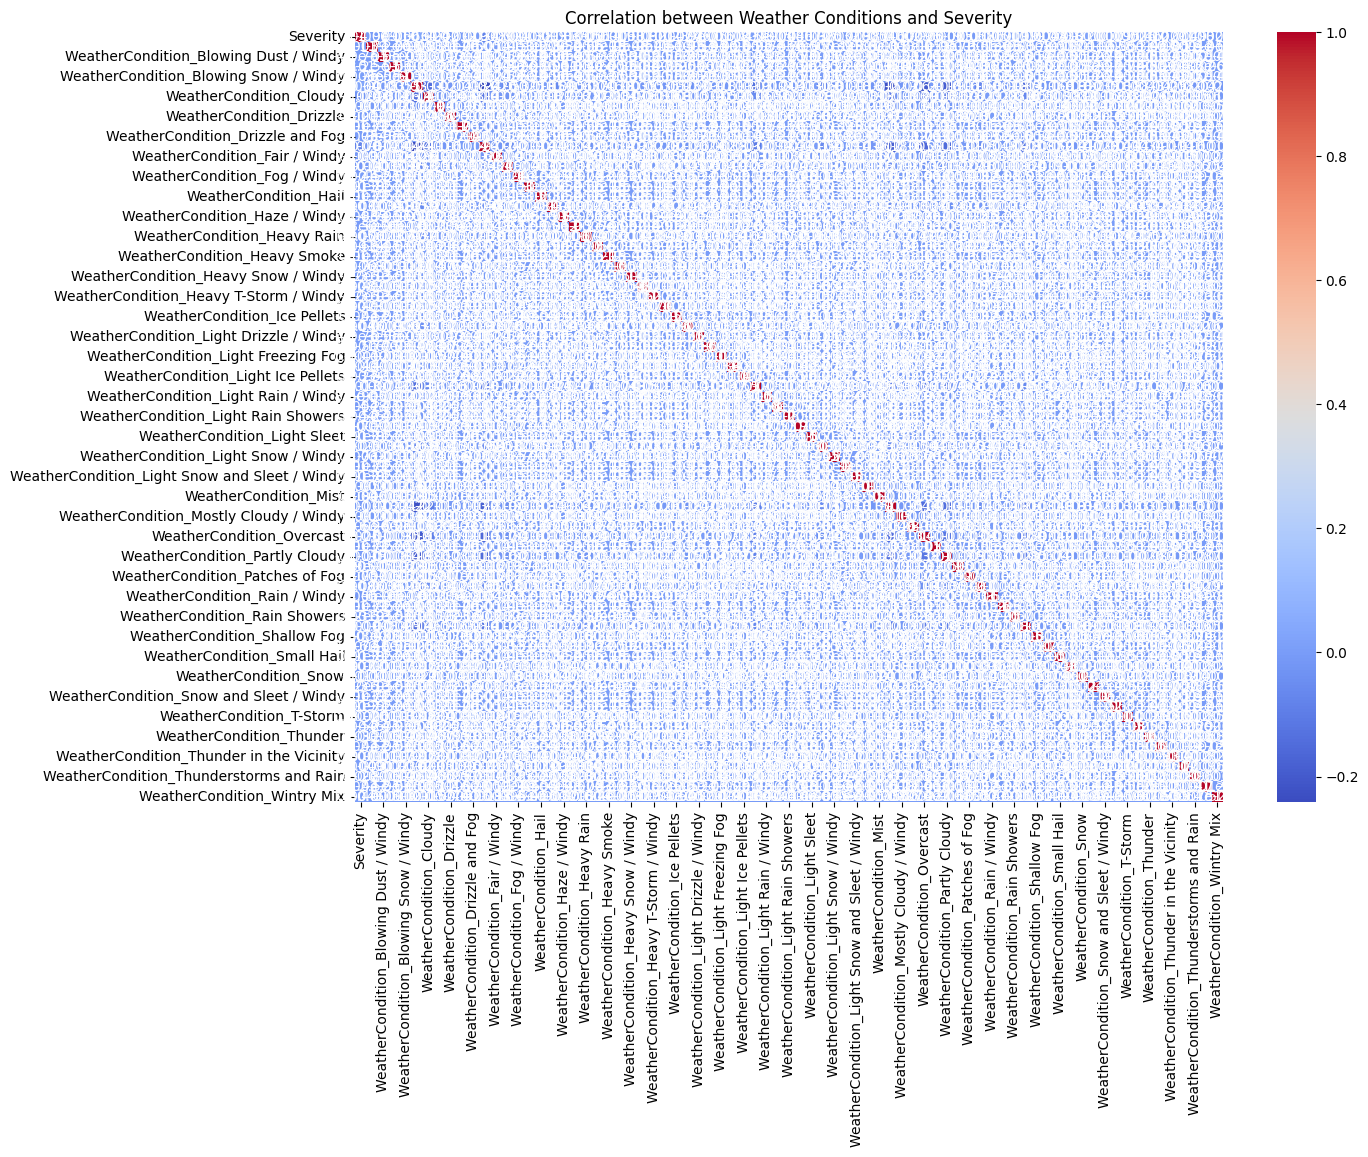

In [28]:
# Select the columns of interest (weather conditions and severity)
weather_columns = [col for col in data.columns if col.startswith('WeatherCondition_')]
selected_columns = ['Severity'] + weather_columns
selected_data = data[selected_columns]

# Compute the correlation matrix
correlation_matrix = selected_data.corr()

# Create a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation between Weather Conditions and Severity')
plt.show()

In [29]:

# Print the correlations
for column in weather_columns:
    correlation = correlation_matrix.loc['Severity', column]
    print(f'Correlation between Severity and {column}: {correlation:.4f}')

Correlation between Severity and WeatherCondition_Blowing Dust: -0.0019
Correlation between Severity and WeatherCondition_Blowing Dust / Windy: -0.0000
Correlation between Severity and WeatherCondition_Blowing Snow: 0.0102
Correlation between Severity and WeatherCondition_Blowing Snow / Windy: 0.0066
Correlation between Severity and WeatherCondition_Clear: 0.0340
Correlation between Severity and WeatherCondition_Cloudy: -0.0240
Correlation between Severity and WeatherCondition_Cloudy / Windy: 0.0020
Correlation between Severity and WeatherCondition_Drizzle: -0.0012
Correlation between Severity and WeatherCondition_Drizzle / Windy: -0.0019
Correlation between Severity and WeatherCondition_Drizzle and Fog: -0.0034
Correlation between Severity and WeatherCondition_Fair: -0.0776
Correlation between Severity and WeatherCondition_Fair / Windy: -0.0092
Correlation between Severity and WeatherCondition_Fog: -0.0136
Correlation between Severity and WeatherCondition_Fog / Windy: 0.0013
Correlati

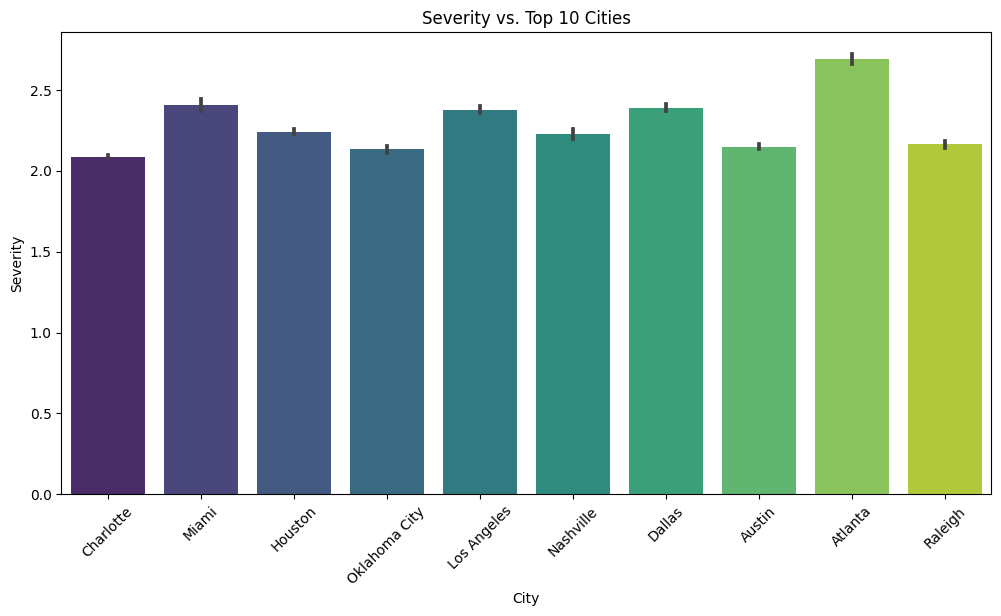

In [30]:

# Get the top 10 cities by frequency
top_cities = data['City'].value_counts().nlargest(10).index

# Filter the data for the top 10 cities
data_top_cities = data[data['City'].isin(top_cities)]

# Create a bar plot for Severity vs. City
plt.figure(figsize=(12, 6))
sns.barplot(data=data_top_cities, x='City', y='Severity', palette='viridis')
plt.title('Severity vs. Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Severity')
plt.xticks(rotation=45)  # Rotate x-axis la
plt.show()

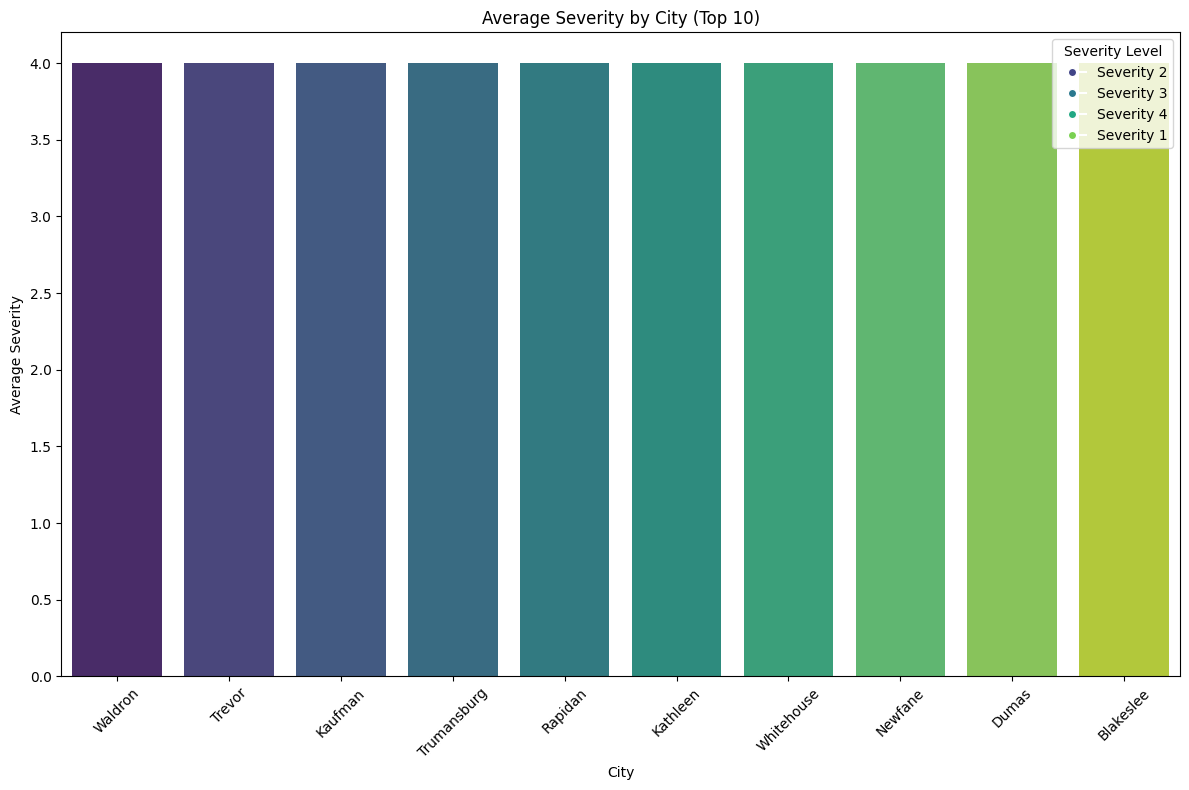

In [31]:
# Calculate average severity for each city
average_severity_by_city = data.groupby('City')['Severity'].mean().sort_values(ascending=False).head(10)

# Create a bar plot with legends
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=average_severity_by_city.index, y=average_severity_by_city.values, palette='viridis')

# Add a legend for severity levels
severity_levels = data['Severity'].unique()
legend_labels = [f'Severity {level}' for level in severity_levels]

# Customize the legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color) for label, color in zip(legend_labels, sns.color_palette('viridis', len(severity_levels)))]

plt.legend(handles=handles, title='Severity Level', loc='upper right')
plt.title('Average Severity by City (Top 10)')
plt.xlabel('City')
plt.ylabel('Average Severity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

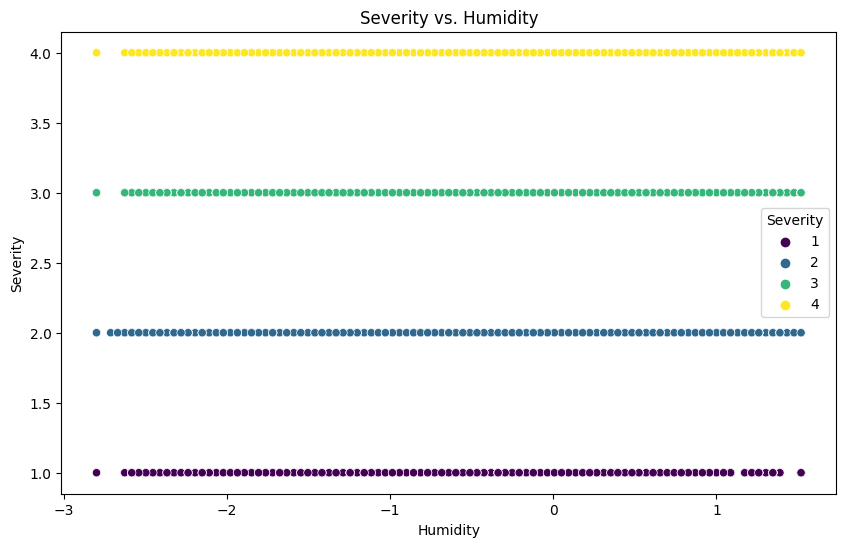

In [32]:
# Create a scatter plot for Severity against Humidity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Humidity', y='Severity', hue='Severity', palette='viridis')
plt.title('Severity vs. Humidity')
plt.xlabel('Humidity')
plt.ylabel('Severity')
plt.show()

In [33]:
# Print the structure of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99972 entries, 0 to 99999
Data columns (total 95 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Severity                                       99972 non-null  int64  
 1   StartLat                                       99972 non-null  float64
 2   StartLng                                       99972 non-null  float64
 3   Distance                                       99972 non-null  float64
 4   Street                                         99972 non-null  object 
 5   City                                           99972 non-null  object 
 6   State                                          99972 non-null  object 
 7   Zipcode                                        99972 non-null  int64  
 8   Temperature                                    99972 non-null  float64
 9   Humidity                                       999

In [34]:
data.to_csv('CLEANED .csv', index=False)

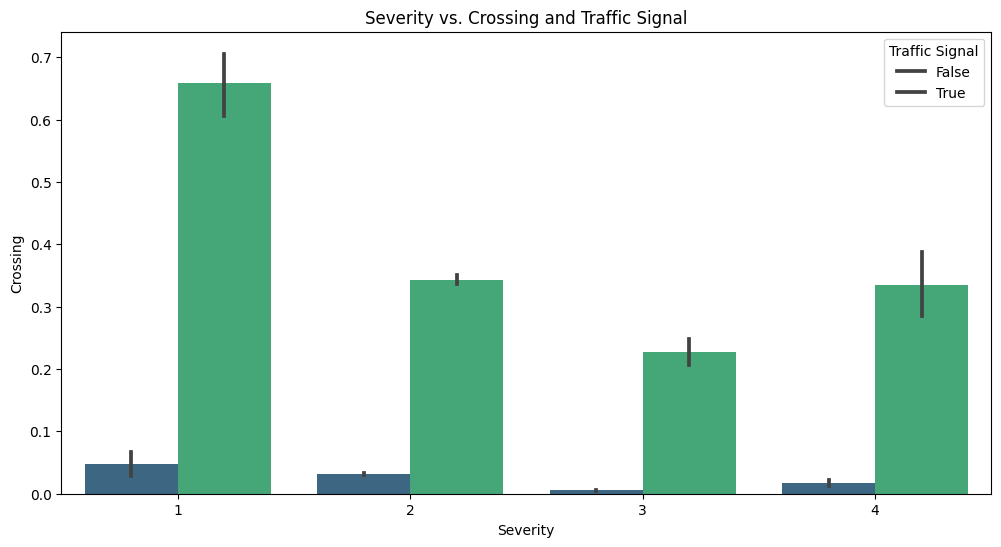

In [35]:

# Create a bar plot for Severity vs. Crossing and Traffic Signal
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Severity', y='Crossing', hue='TrafficSignal', palette='viridis')

# Set labels and title
plt.title('Severity vs. Crossing and Traffic Signal')
plt.xlabel('Severity')
plt.ylabel('Crossing')
plt.legend(title='Traffic Signal', labels=['False', 'True'])

# Show the plot
plt.show()



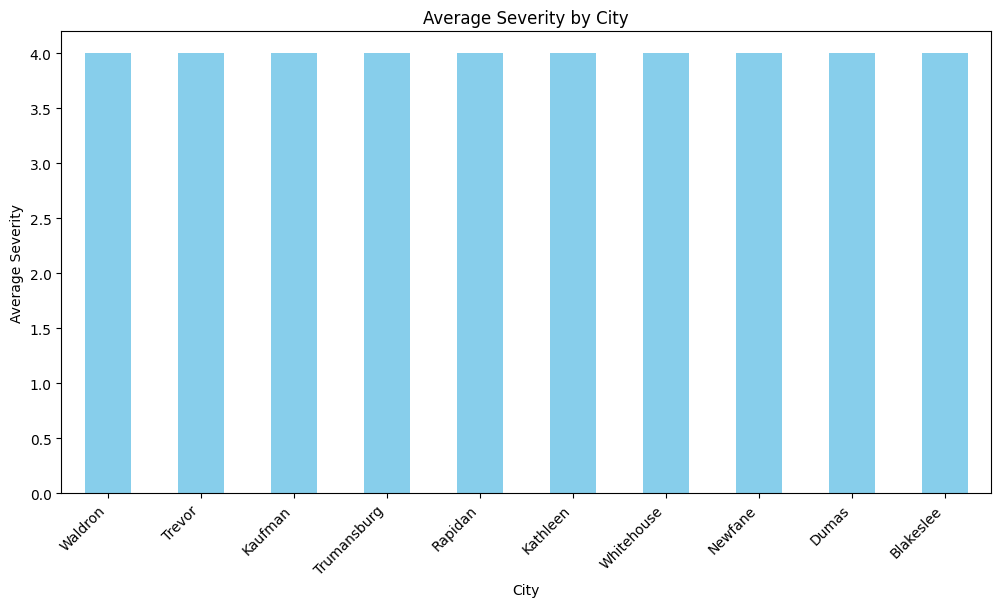

In [36]:

import matplotlib.pyplot as plt

# Group data by City and calculate the mean severity
city_severity = data.groupby('City')['Severity'].mean().sort_values(ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
city_severity.plot(kind='bar', color='skyblue')
plt.title('Average Severity by City')
plt.xlabel('City')
plt.ylabel('Average Severity')
plt.xticks(rotation=45, ha='right')
plt.show()


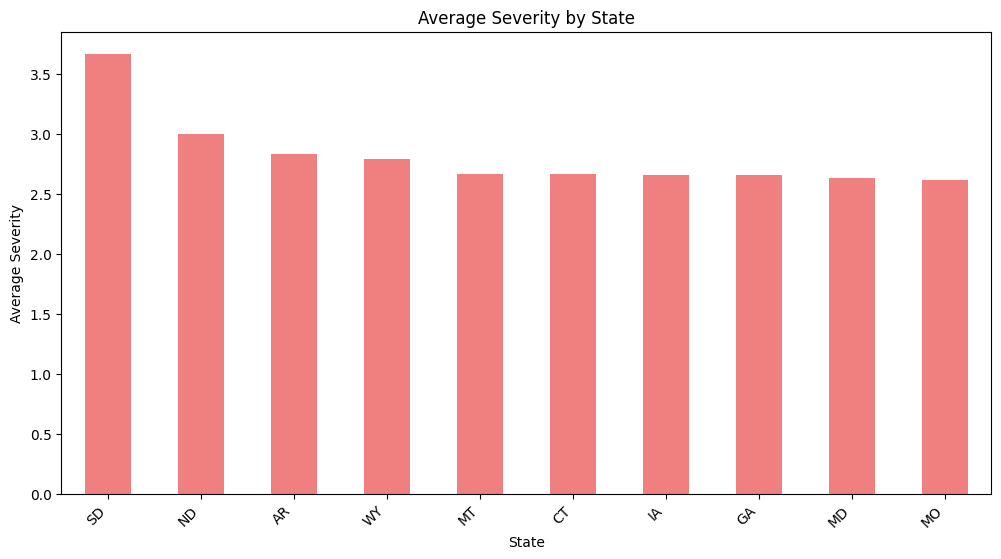

In [37]:
# Group data by State and calculate the mean severity
state_severity = data.groupby('State')['Severity'].mean().sort_values(ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
state_severity.plot(kind='bar', color='lightcoral')
plt.title('Average Severity by State')
plt.xlabel('State')
plt.ylabel('Average Severity')
plt.xticks(rotation=45, ha='right')
plt.show()


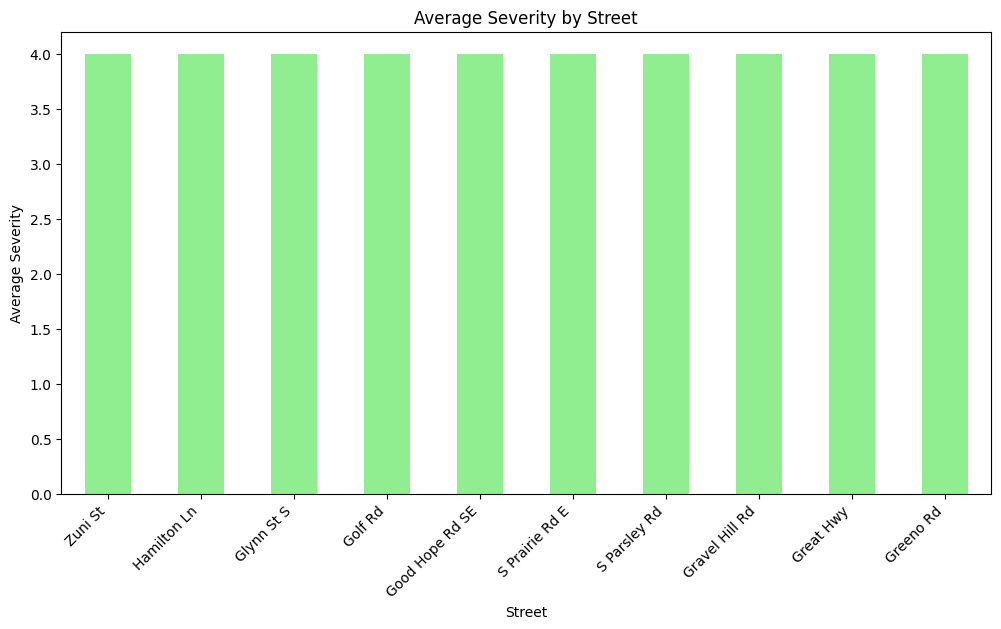

In [38]:
# Group data by Street and calculate the mean severity
street_severity = data.groupby('Street')['Severity'].mean().sort_values(ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
street_severity.plot(kind='bar', color='lightgreen')
plt.title('Average Severity by Street')
plt.xlabel('Street')
plt.ylabel('Average Severity')
plt.xticks(rotation=45, ha='right')
plt.show()


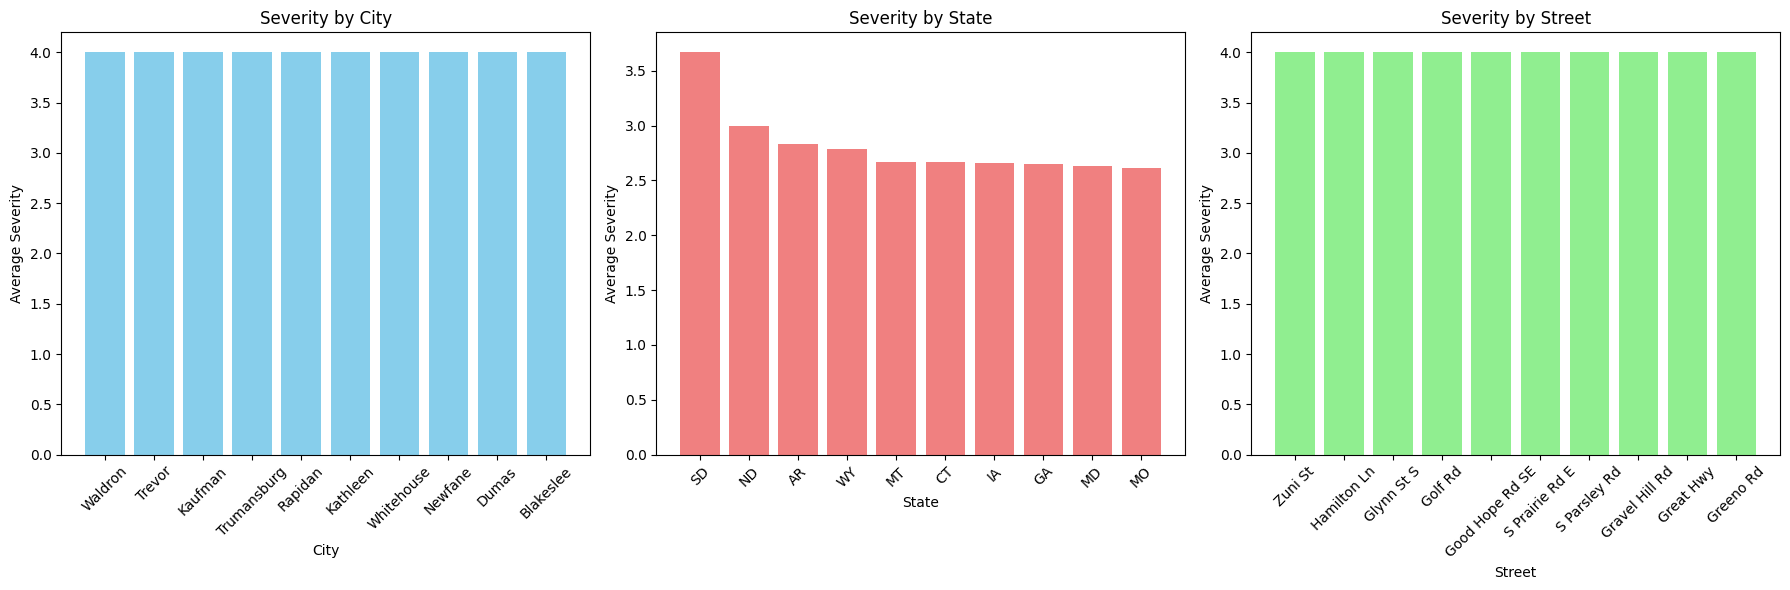

In [39]:
import matplotlib.pyplot as plt

# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Severity by City
city_severity = data.groupby('City')['Severity'].mean().sort_values(ascending=False).head(10)
axes[0].bar(city_severity.index, city_severity, color='skyblue')
axes[0].set_title('Severity by City')
axes[0].set_xlabel('City')
axes[0].set_ylabel('Average Severity')
axes[0].tick_params(axis='x', rotation=45, labelsize=10)

# Plot 2: Severity by State
state_severity = data.groupby('State')['Severity'].mean().sort_values(ascending=False).head(10)
axes[1].bar(state_severity.index, state_severity, color='lightcoral')
axes[1].set_title('Severity by State')
axes[1].set_xlabel('State')
axes[1].set_ylabel('Average Severity')
axes[1].tick_params(axis='x', rotation=45, labelsize=10)

# Plot 3: Severity by Street
street_severity = data.groupby('Street')['Severity'].mean().sort_values(ascending=False).head(10)
axes[2].bar(street_severity.index, street_severity, color='lightgreen')
axes[2].set_title('Severity by Street')
axes[2].set_xlabel('Street')
axes[2].set_ylabel('Average Severity')
axes[2].tick_params(axis='x', rotation=45, labelsize=10)

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()


##**DATA MODELING**

In [72]:
df = pd.read_csv('/content/CLEANED .csv')



In [50]:
selected_columns = ['Temperature', 'Humidity', 'Pressure', 'Visibility', 'WindSpeed', 'Precipitation']
X = df[selected_columns]
y = df['Severity']

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**MODEL 1 - LinearRegression**

In [52]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()


In [53]:
model.fit(X_train, y_train)


LinearRegression()

In [54]:
y_pred = model.predict(X_test)


In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared (R2): {r2}")


Mean Absolute Error: 0.4784912121061745
Mean Squared Error: 0.30047532071397387
Root Mean Squared Error: 0.5481562922324015
R-squared (R2): 0.0013206145534020441


**MODEL 2 - DecisionTreeRegressor**

In [57]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor()


In [58]:
# Train the model
model2.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model2.predict(X_test)

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")
print(f"Mean Squared Error (MSE): {mse}")

Mean Absolute Error (MAE): 0.5145077936150705
Root Mean Squared Error (RMSE): 0.7871289010483641
R-squared (R2) Score: -1.0592496239567
Mean Squared Error (MSE): 0.6195719068656053


**MODEL3 -  RandomForestRegressor**

In [62]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor()


In [63]:

# Train the model
model3.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model3.predict(X_test)

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")
print(f"Mean Squared Error (MSE): {mse}")


Mean Absolute Error (MAE): 0.4760618686417636
Root Mean Squared Error (RMSE): 0.5677200794613333
R-squared (R2) Score: -0.07123755038337465
Mean Squared Error (MSE): 0.32230608862358257


**MODEL 4  - KNeighborsRegressor**

In [64]:
from sklearn.neighbors import KNeighborsRegressor
model3 = KNeighborsRegressor()


In [65]:

# Train the model
model3.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model3.predict(X_test)

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")
print(f"Mean Squared Error (MSE): {mse}")


Mean Absolute Error (MAE): 0.4752288072018005
Root Mean Squared Error (RMSE): 0.5934560198632061
R-squared (R2) Score: -0.17056182642161732
Mean Squared Error (MSE): 0.352190047511878


In [66]:

# Initialize the models
model1 = LinearRegression()
model2 = DecisionTreeRegressor()
model3 = RandomForestRegressor()
model4 = KNeighborsRegressor(n_neighbors=5)  # Adjust n_neighbors as needed

# Lists to store results
model_names = ["Linear Regression", "Decision Tree", "Random Forest", "K-Nearest Neighbors"]
mae_scores = []
rmse_scores = []
r2_scores = []
mse_scores = []

# Train and evaluate each model
models = [model1, model2, model3, model4]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    mae_scores.append(mae)
    rmse_scores.append(rmse)
    r2_scores.append(r2)
    mse_scores.append(mse)

# Create a DataFrame to compare results
import pandas as pd
results = pd.DataFrame({
    "Model": model_names,
    "MAE": mae_scores,
    "RMSE": rmse_scores,
    "R2": r2_scores,
    "MSE": mse_scores
})

print(results)


                 Model       MAE      RMSE        R2       MSE
0    Linear Regression  0.478491  0.548156  0.001321  0.300475
1        Decision Tree  0.510182  0.783829 -1.042022  0.614389
2        Random Forest  0.476197  0.568218 -0.073116  0.322871
3  K-Nearest Neighbors  0.475229  0.593456 -0.170562  0.352190


**BEST MODEL**

In [67]:
# Assuming you have already trained and evaluated the models and stored their metrics in the results DataFrame
# results DataFrame contains columns: "Model", "MAE", "RMSE", "R2", "MSE"

# Find the model with the lowest MAE
best_model_mae = results[results['MAE'] == results['MAE'].min()]

# Find the model with the lowest RMSE
best_model_rmse = results[results['RMSE'] == results['RMSE'].min()]

# Find the model with the highest R2
best_model_r2 = results[results['R2'] == results['R2'].max()]

# Print the best model based on different criteria
print("Best Model based on MAE:")
print(best_model_mae)

print("\nBest Model based on RMSE:")
print(best_model_rmse)

print("\nBest Model based on R2:")
print(best_model_r2)


Best Model based on MAE:
                 Model       MAE      RMSE        R2      MSE
3  K-Nearest Neighbors  0.475229  0.593456 -0.170562  0.35219

Best Model based on RMSE:
               Model       MAE      RMSE        R2       MSE
0  Linear Regression  0.478491  0.548156  0.001321  0.300475

Best Model based on R2:
               Model       MAE      RMSE        R2       MSE
0  Linear Regression  0.478491  0.548156  0.001321  0.300475
